#Sentiment Analysis of Financial Tweets

###Data preparation

In [ ]:
import pandas as pd

df1 = pd.read_csv("/content/drive/MyDrive/datasets/stockerbot-export1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/datasets/tweet_sentiment.csv")

To make it easier for us to work, we will merge the two data sources into one dataframe

In [ ]:
result = pd.DataFrame()

result = df1

In [ ]:
result['cleaned_tweets'] = df2['cleaned_tweets']

In [ ]:
result['sentiment'] = df2['sentiment']

In [ ]:
df = result

###Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


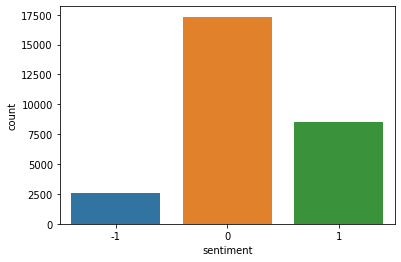

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(df['sentiment'])

### Clustering for sentiment analysis of financial tweets

In [ ]:
 pip install transformers

In [ ]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
df1.text.values

array(['VIDEO: “I was in my office. I was minding my own business...” –David Solomon tells $GS interns how he learned he wa… https://t.co/QClAITywXV',
       "The price of lumber $LB_F is down 22% since hitting its YTD highs. The Macy's $M turnaround is still happening.… https://t.co/XnKsV4De39",
       'Who says the American Dream is dead? https://t.co/CRgx19x7sA',
       ...,
       "RT @invest_in_hd: 'Nuff said!  $TEL #telcoin #Telfam #crypto #Blockchain #ethereum #bitcoin $BTC $ETH https://t.co/dkRvaYzgcd",
       '【仮想通貨】ビットコインの価格上昇、８０万円台回復\u3000約１カ月半ぶり\u3000\u3000\u3000\u3000\u3000\u3000$BTC https://t.co/1OaM6ANOLX https://t.co/Ezd82kCt9L',
       'Stellar $XLM price: $0.297852 Binance registration is now OPEN for limited time! 💸 💰  ➡️… https://t.co/TteerEnNjo'],
      dtype=object)

In [ ]:
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(df1.text.values)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(message_embeddings)
clusters = km.labels_.tolist()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np


data = message_embeddings
pca = PCA(2)
 
#Transform the data
df_clustering_new = pca.fit_transform(data)

In [ ]:
#Initialize the class object
kmeans = KMeans(n_clusters=3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_clustering_new)
 
#Getting unique labels
u_labels = np.unique(label)
 
labels = kmeans.labels_

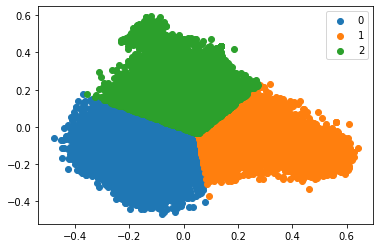

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plotting the results:
for i in u_labels:
    plt.scatter(df_clustering_new[label == i , 0] , df_clustering_new[label == i , 1] , label = i)
plt.legend()
plt.show()

### CNN & LSTM for sentiment analysis

In [ ]:
X = df['text']
y = pd.get_dummies(df['sentiment']).values
num_classes = df['sentiment'].nunique()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, 
                                                    test_size=0.2,
                                                    random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(22752,) (5688,) (22752, 3) (5688, 3)


In [ ]:
# Tokenize Text
from keras.preprocessing.text import Tokenizer
max_features = 100
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

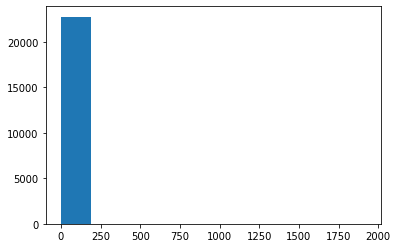

In [ ]:
import matplotlib.pyplot as plt
totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords)
plt.show()

In [ ]:
from keras.preprocessing import sequence
max_words = 20
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(22752, 20) (5688, 20)


In [ ]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM, Flatten
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 20, input_length=X_train.shape[1]))
model.add(Conv1D(filters=20, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=10, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))    
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_history = model.fit(X_train, Y_train,  epochs=10, batch_size=120, verbose=2, validation_split=0.2)

Epoch 1/10
152/152 - 7s - loss: 0.8622 - accuracy: 0.6291 - val_loss: 0.7098 - val_accuracy: 0.7220 - 7s/epoch - 43ms/step
Epoch 2/10
152/152 - 3s - loss: 0.6930 - accuracy: 0.7286 - val_loss: 0.6624 - val_accuracy: 0.7488 - 3s/epoch - 18ms/step
Epoch 3/10
152/152 - 3s - loss: 0.6526 - accuracy: 0.7455 - val_loss: 0.6184 - val_accuracy: 0.7666 - 3s/epoch - 18ms/step
Epoch 4/10
152/152 - 3s - loss: 0.6199 - accuracy: 0.7579 - val_loss: 0.6041 - val_accuracy: 0.7660 - 3s/epoch - 18ms/step
Epoch 5/10
152/152 - 3s - loss: 0.5993 - accuracy: 0.7663 - val_loss: 0.5910 - val_accuracy: 0.7708 - 3s/epoch - 18ms/step
Epoch 6/10
152/152 - 3s - loss: 0.5861 - accuracy: 0.7714 - val_loss: 0.5858 - val_accuracy: 0.7748 - 3s/epoch - 18ms/step
Epoch 7/10
152/152 - 3s - loss: 0.5741 - accuracy: 0.7759 - val_loss: 0.5759 - val_accuracy: 0.7737 - 3s/epoch - 18ms/step
Epoch 8/10
152/152 - 3s - loss: 0.5639 - accuracy: 0.7803 - val_loss: 0.5741 - val_accuracy: 0.7792 - 3s/epoch - 19ms/step
Epoch 9/10
152/1

In [ ]:
 y_pred = model.predict(X_test)

In [ ]:
 y_pred = y_pred.round()

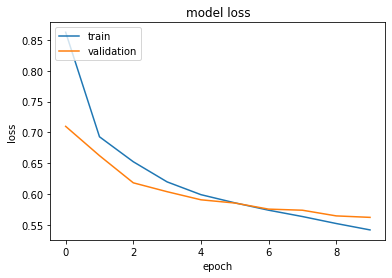

In [ ]:
# "Loss"
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

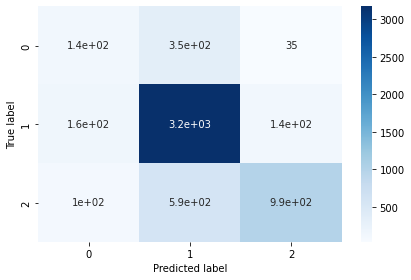

In [ ]:
import seaborn as sns
import numpy as np

confmat = confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(y_pred,axis=1))

sns.heatmap(confmat,annot=True,cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(Y_test,axis=1), np.argmax(y_pred,axis=1)))

              precision    recall  f1-score   support

           0       0.34      0.26      0.29       525
           1       0.77      0.91      0.84      3475
           2       0.85      0.59      0.70      1688

    accuracy                           0.76      5688
   macro avg       0.65      0.59      0.61      5688
weighted avg       0.75      0.76      0.74      5688



### XGBoost

In [ ]:
df2 = df2.sample(frac = 0.04)

In [ ]:
df2['cleaned_tweets'] = df2['cleaned_tweets'].fillna('')

In [ ]:
df2['sentiment']=df2['sentiment'].mask(df2['sentiment']<0,2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
names = df2['cleaned_tweets']
X = vectorizer.fit_transform(names)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()
data = pd.DataFrame(denselist, columns=feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:]],  df2['sentiment'], test_size=0.2)

In [ ]:
from xgboost import XGBClassifier


#inicialize XGBoost
model = XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,n_jobs=-1 , verbose=1,learning_rate=0.16)

# Add silent=True to avoid printing out updates with each cycle
model.fit(X_train, Y_train)

#make prediction
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8947368421052632


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[144   5   0]
 [ 10  48   1]
 [  8   0  12]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       149
           1       0.91      0.81      0.86        59
           2       0.92      0.60      0.73        20

    accuracy                           0.89       228
   macro avg       0.91      0.79      0.84       228
weighted avg       0.90      0.89      0.89       228



### Best model

In this case, a better model is XGBoost because it has a better f1-score and greater accuracy.